In [2]:
#Importing all the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import timeit
%timeit
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Imputer

In [3]:
# Load the CSV file to a Pandas Dataframe

df=pd.read_csv("movie_metadata.csv")

# Face detection from movie posters

Will the number of human faces in movie poster correlate with the movie rating? 

Movie poster is an important way to make public aware of the movie before its release. It is quite common to see faces in movie posters. It should be pointed out that, most movies have more than one posters. Some may argue it is unreliable to detect faces only from one poster. Well, it is indeed true. However, just like a great book usually having a single cover, I believe a great movie needs to have a "main" poster, the one that the director likes most, or long-remembered by viewers. I have no way to tell which posters are the "main" posters. I assume the poster that I webscraped from IMDB main page of a movie is the "main" poster.

In [4]:
# Determine the movies having 1 face in the poster and more than 7.5 imdb_score
df[(df.facenumber_in_poster == 1) & (df.imdb_score > 7.5)][['movie_title','facenumber_in_poster','imdb_score']].sort_values('imdb_score',ascending=False).head(10)

,movie_title,facenumber_in_poster,imdb_score
3466,The Godfather,1.0,9.2
2837,The Godfather: Part II,1.0,9.0
4822,12 Angry Men,1.0,8.9
3355,Pulp Fiction,1.0,8.9
4468,Queen of the Mountains,1.0,8.7
3024,Star Wars: Episode IV - A New Hope,1.0,8.7
1620,Friday Night Lights,1.0,8.7
340,The Lord of the Rings: The Two Towers,1.0,8.7
404,Hannibal,1.0,8.6
4427,Modern Times,1.0,8.6


In [5]:
# Determine the movies having more than 1 face in the poster and more than 7.5 imdb_score
df[(df.facenumber_in_poster > 1) & (df.imdb_score > 7.5)][['movie_title','facenumber_in_poster','imdb_score']].sort_values('imdb_score',ascending=False).head(10)

,movie_title,facenumber_in_poster,imdb_score
2765,Towering Inferno,2.0,9.5
4409,Kickboxer: Vengeance,5.0,9.1
339,The Lord of the Rings: The Return of the King,2.0,8.9
4498,"The Good, the Bad and the Ugly",3.0,8.9
683,Fight Club,2.0,8.8
270,The Lord of the Rings: The Fellowship of the R...,2.0,8.8
1842,It's Always Sunny in Philadelphia,5.0,8.8
654,The Matrix,3.0,8.7
1818,The Honeymooners,4.0,8.7
3579,Gomorrah,5.0,8.7


(0, 5)

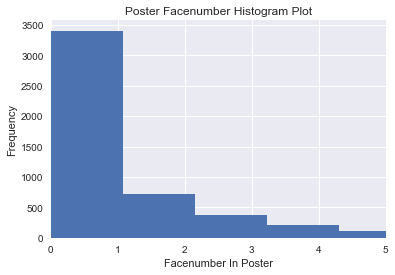

In [6]:
df['facenumber_in_poster'].dropna().plot(kind='hist',bins=40)
plt.xlabel('Facenumber In Poster')
plt.title('Poster Facenumber Histogram Plot')
plt.xlim(0,5)

In [7]:
# Determine the movies having more than 5 face in the poster and more than 7.5 imdb_score
df[(df.facenumber_in_poster > 10) & (df.imdb_score > 7.5)][['movie_title','facenumber_in_poster','imdb_score']].sort_values('imdb_score',ascending=False)

,movie_title,facenumber_in_poster,imdb_score
2667,Boogie Nights,15.0,7.9
3468,500 Days of Summer,43.0,7.7
4789,As It Is in Heaven,15.0,7.6


In [8]:
count = df['facenumber_in_poster'].value_counts()

In [9]:
len(df['facenumber_in_poster'])

5043

In [10]:
count

0.0     2152
1.0     1251
2.0      716
3.0      380
4.0      207
5.0      114
6.0       76
7.0       48
8.0       37
9.0       18
10.0      10
15.0       6
11.0       5
12.0       4
13.0       2
19.0       1
14.0       1
31.0       1
43.0       1
Name: facenumber_in_poster, dtype: int64

In [11]:
(count)/len(df['facenumber_in_poster'])*100

0.0     42.673012
1.0     24.806663
2.0     14.197898
3.0      7.535197
4.0      4.104700
5.0      2.260559
6.0      1.507039
7.0      0.951814
8.0      0.733690
9.0      0.356930
10.0     0.198295
15.0     0.118977
11.0     0.099147
12.0     0.079318
13.0     0.039659
19.0     0.019829
14.0     0.019829
31.0     0.019829
43.0     0.019829
Name: facenumber_in_poster, dtype: float64

It should be pointed out that, it is unfair to rate movie solely based on the number of human faces in poster, because there are great movies whose posters have many faces. For example, the poster of the movie "(500) Days of summer" has 43 faces, all from the same actress.

But remember that having large face number (> 10) in poster and simultaneously being a great movie is uncommon based on my findings. 

Overall, nearly 95% of all the 4096 posters have less than 5 faces. Besides,Great movies tend to have fewer faces in posters.

If a poster has one or no human faces, we cannot tell if the movie is great simply from poster.

If a poster has more than 5 faces, the likelihood of the movie being great is low.


# IMDB score VS country


In [12]:
df['country'].dropna().value_counts().head(30)

USA             3807
UK               448
France           154
Canada           126
Germany           97
Australia         55
India             34
Spain             33
China             30
Japan             23
Italy             23
Mexico            17
Hong Kong         17
New Zealand       15
South Korea       14
Ireland           12
Russia            11
Denmark           11
Brazil             8
Norway             8
South Africa       8
Sweden             6
Poland             5
Netherlands        5
Thailand           5
Romania            4
Iran               4
Belgium            4
Israel             4
Argentina          4
Name: country, dtype: int64

In [13]:
df_copy= df.copy()

In [14]:
#df_copy.country.dropna().value_counts().head(30)
df_copy=df_copy[['country','imdb_score']].sort_values(by=['imdb_score','country'])
df_med=(df_copy.groupby(by='country').median().sort_values(by='imdb_score',ascending=False))
df_count=df_copy['country'].value_counts()
df_count=pd.DataFrame(data=df_count)


In [15]:
df_med

,imdb_score
country,
Kyrgyzstan,8.70
Libya,8.40
United Arab Emirates,8.20
Egypt,8.10
Soviet Union,8.10
Iran,7.95
Sweden,7.75
Brazil,7.70
Indonesia,7.60


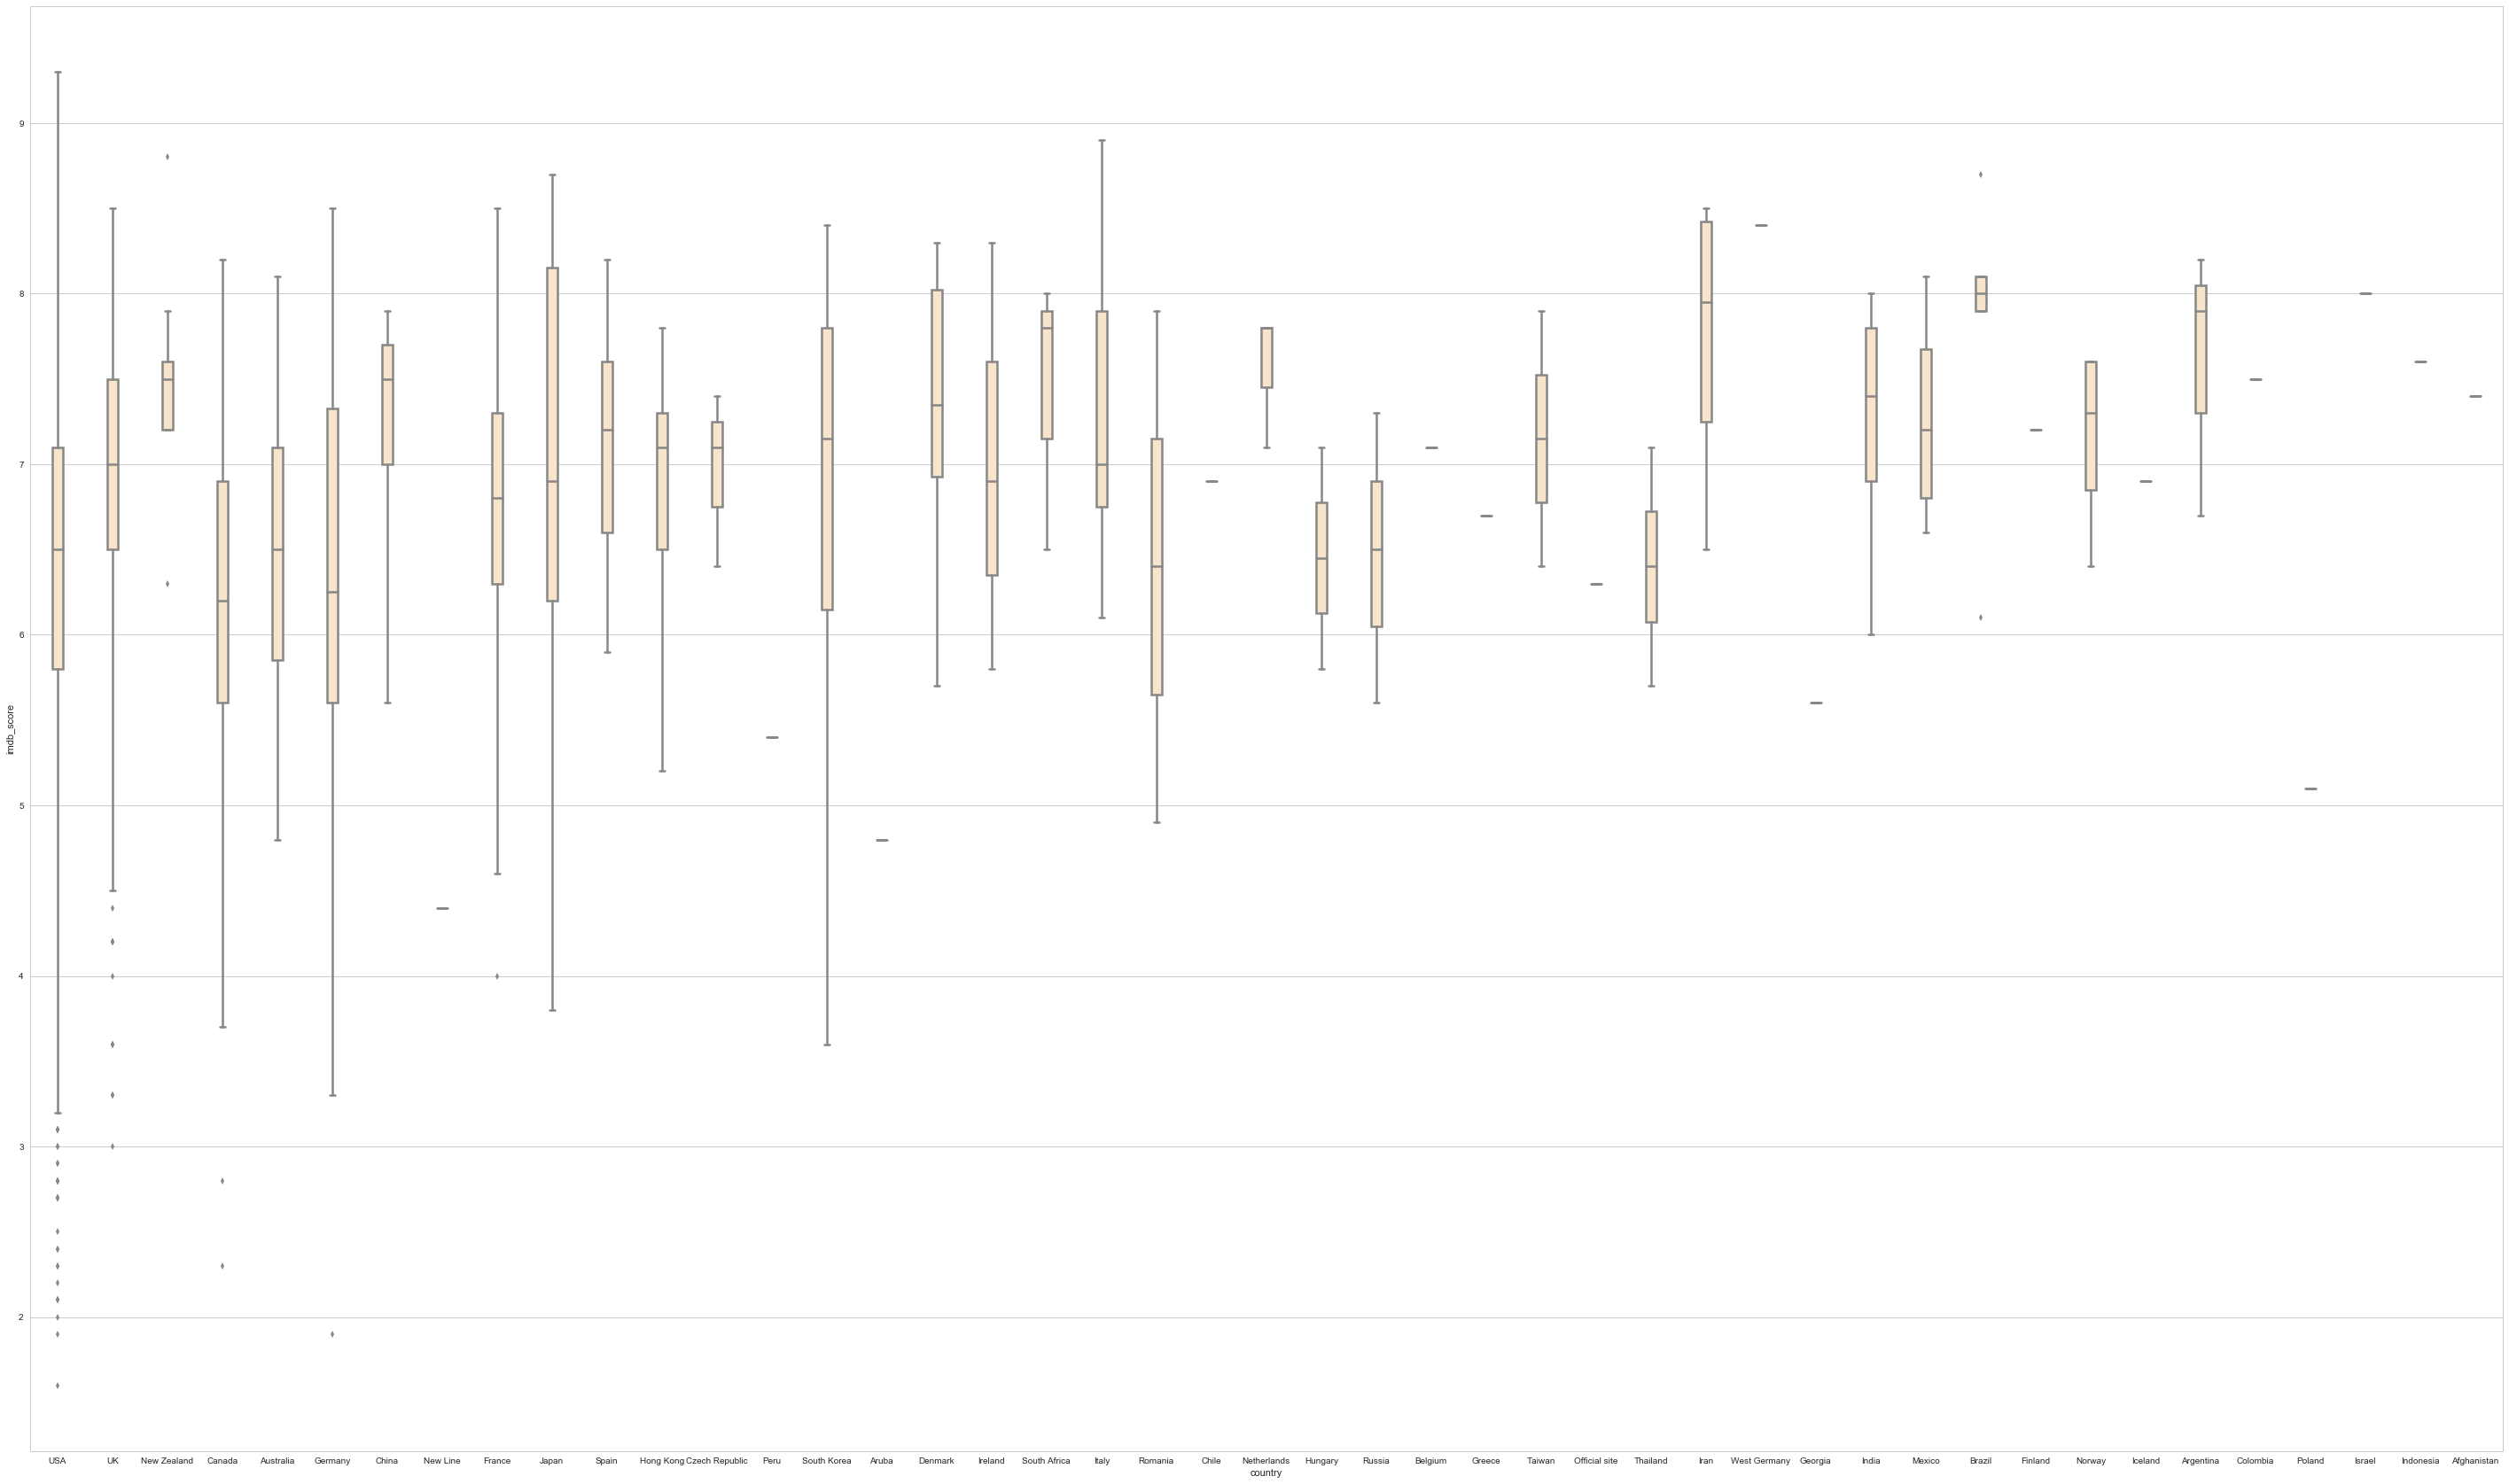

In [16]:
plt.figure(figsize=(50,30))
sns.set_style("whitegrid")
sns.boxplot(x="country", y="imdb_score", data=df.dropna(), width=0.2, color='bisque', whis=2, linewidth=2.5)

10 loops, best of 3: 57.2 ms per loop


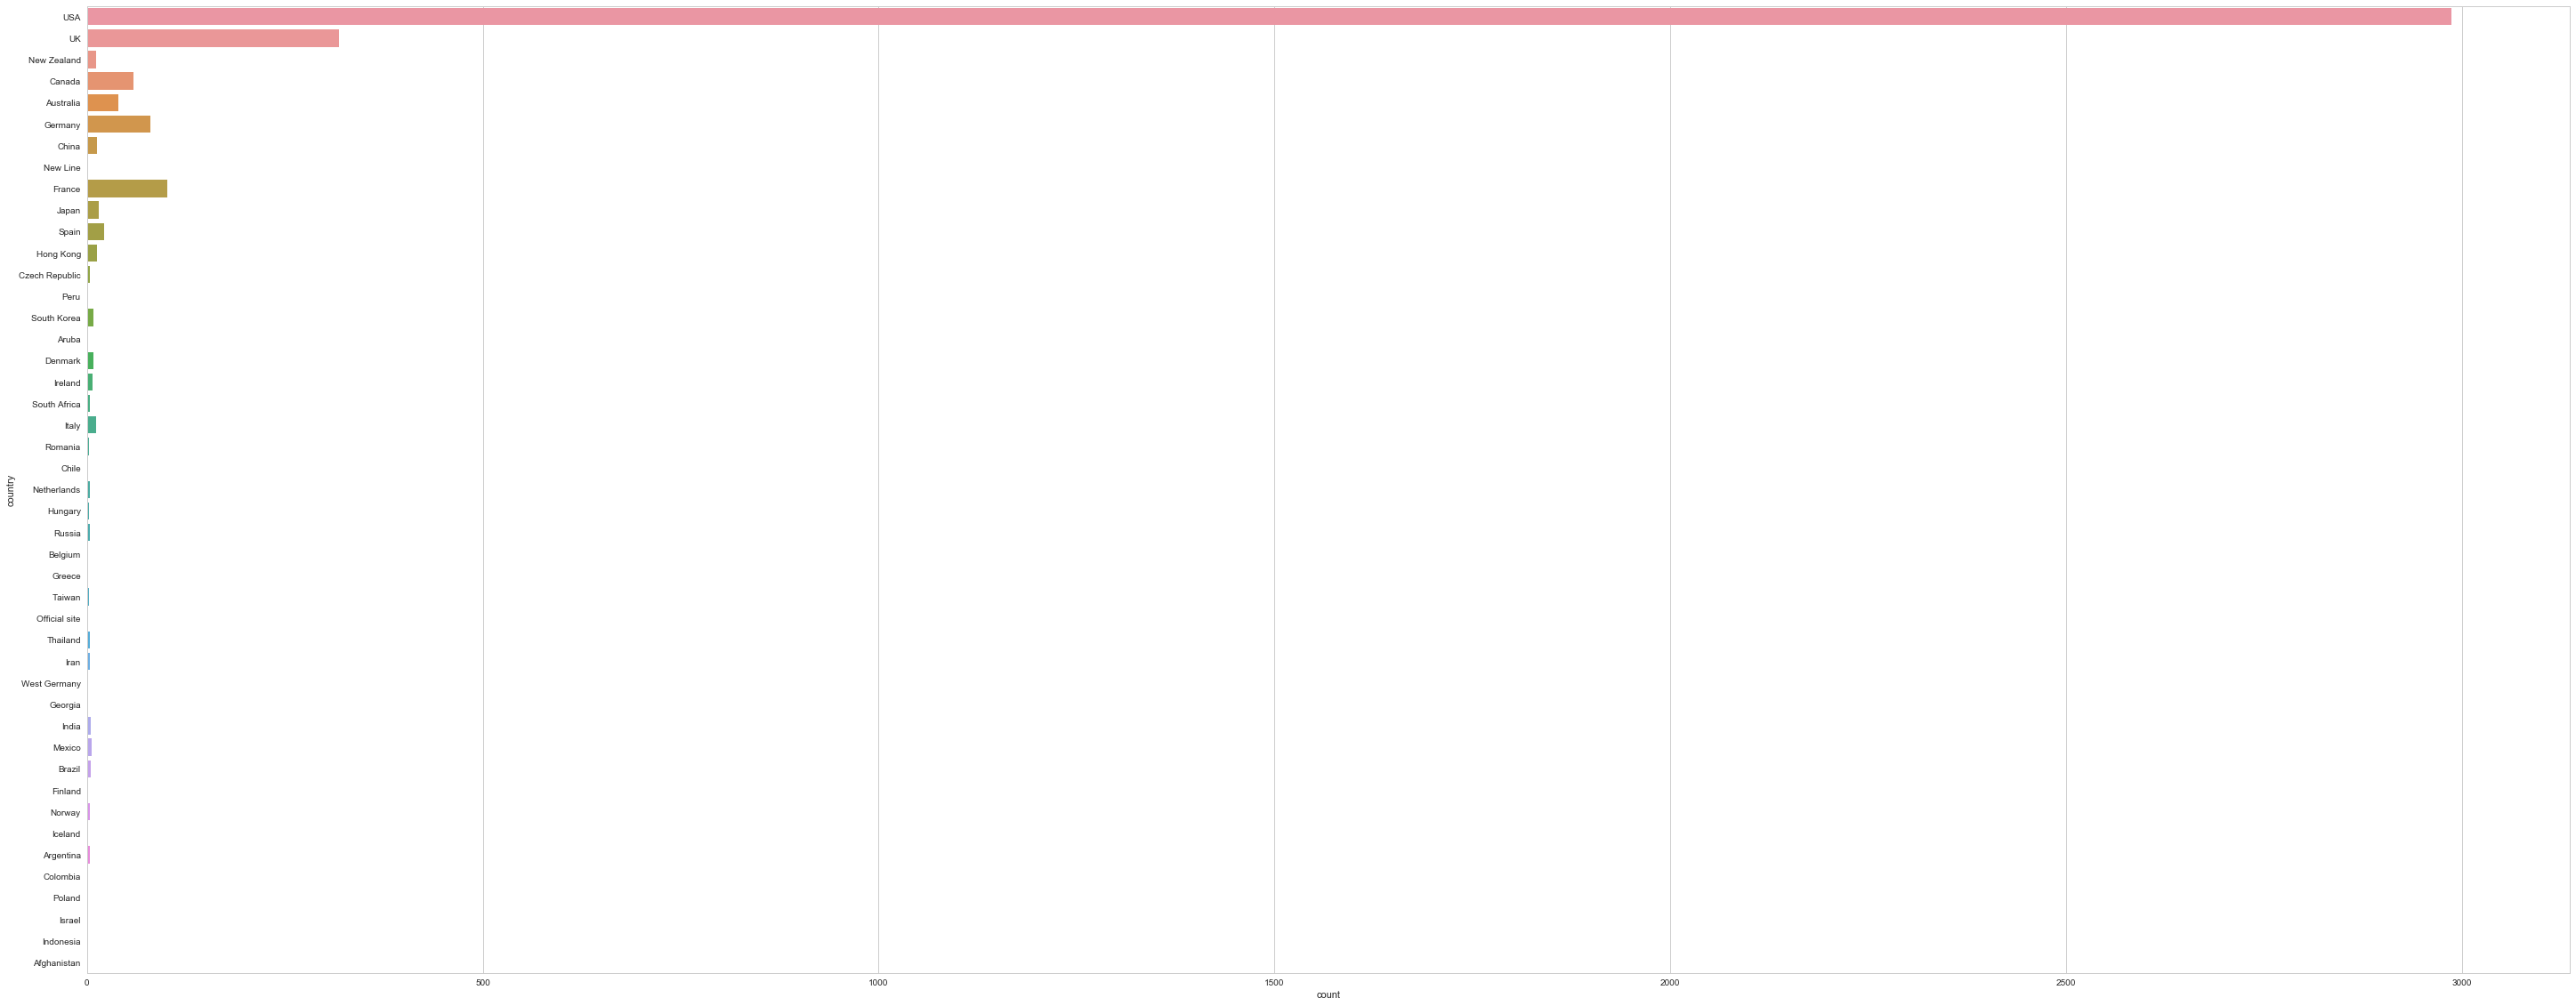

In [17]:
plt.figure(figsize=(50,20))
%timeit sns.countplot(y="country", data=df.dropna())

USA and UK are the two countries that produced the most number of movies in the past century, including a large amount of bad movies. The median IMDB scores for both USA and UK are, however, not the highest among all countries. Some developing countries, such as Libya, Iran, Brazil, and Afghanistan, produced a small amount of movies with high median IMDB scores.

# IMDB score VS movie facebook popularity

The social network is a good way to estimate the popularity of certain phenomena. Therefore it is interesting to know how does the IMDB score correlate with the movie popularity in the social network. 

From the scatter plot below, we can find that overall, the movies that have very high facebook likes tend to be the ones that have IMDB scores around 8.0. As we know, IMDB scores of higher than 8.0 are considered as the greatest movies in the IMDB top 250 list. It is interesting to see that those greatest movies do not have the highest facebook popularity. 

The movie "Mad Max" and "Batman vs Superman" both have very high facebook likes, but their IMDB scores are slightly above 8.0. The movie "The Godfather" is deemed as one of the greatest movies, but its facebook popularity is hugely dwarfed by that of the "Interstellar".

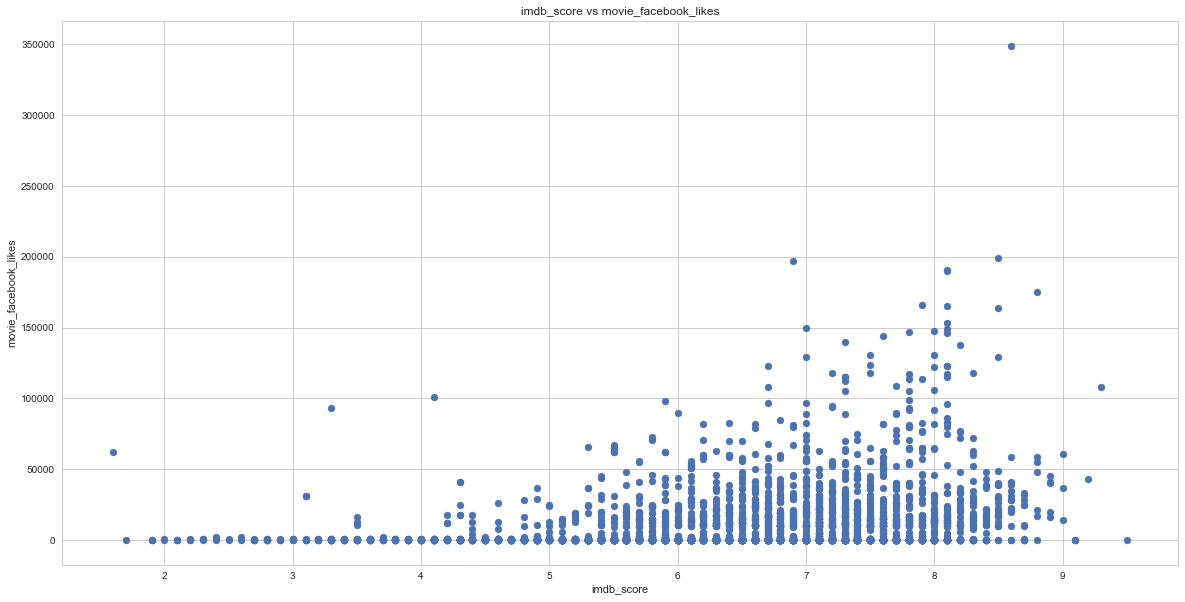

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(df['imdb_score'].dropna(),df['movie_facebook_likes'].dropna())
plt.xlabel('imdb_score')
plt.ylabel('movie_facebook_likes')
plt.title('imdb_score vs movie_facebook_likes')

# IMDB score VS director facebook popularity

It is plausible to believe that the greatness of a movie is highly affected by its director. How does the movie IMDB scores compare with the director facebook popularity? 

From the plot below, it can be seen that the directors who directed movies of rating higher than 6.0 tend to have more facebook popularity than the ones who directed movies of rating lower than 6.0.

And I listed the top four directors who have the most number of facebook popularity (Christopher Nolan, David Fincher, Martin Scorsese, and Quentin Tarantino), along with their four representative movies.

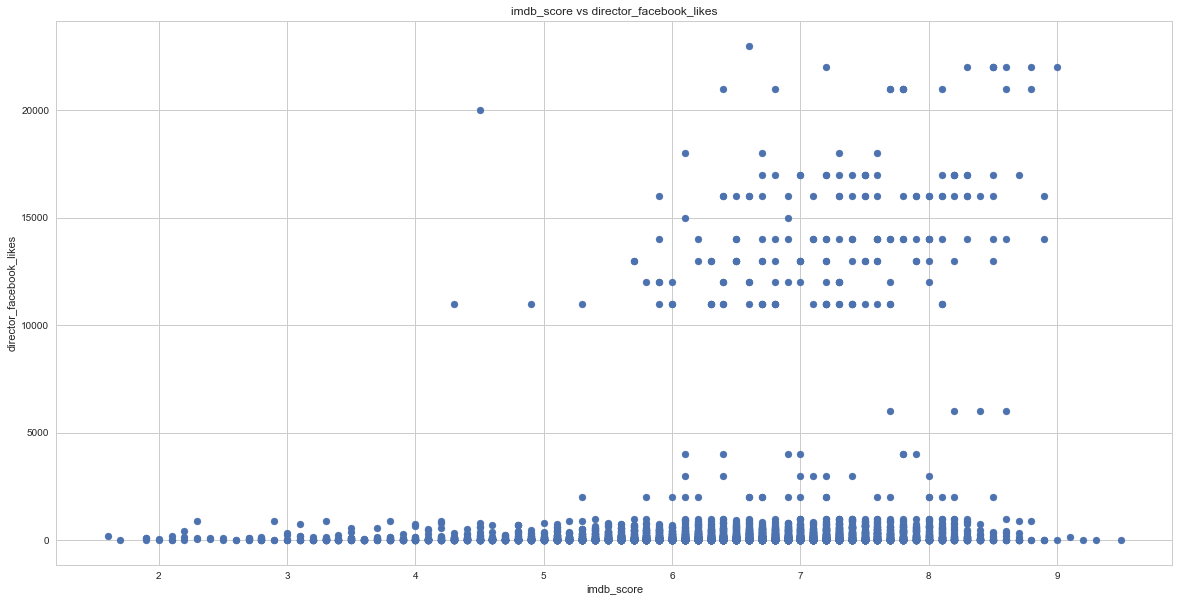

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(df['imdb_score'],df['director_facebook_likes'])
plt.xlabel('imdb_score')
plt.ylabel('director_facebook_likes')
plt.title('imdb_score vs director_facebook_likes')

# Correlation analysis

Choosing 15 continuous variables, I plotted the correlation matrix below. Note that "imdb_score" in the matrix denote the IMDB rating score of a movie. The matrix reveals that:

>The "cast_total_facebook_likes" has a strong positive correlation with the "actor_1_facebook_likes", and has smaller positive correlation with both "actor_2_facebook_likes" and "actor_3_facebook_likes".

>The "movie_facebook_likes" has strong correlation with "num_critic_for_reviews", meaning that the popularity of a movie in social network can be largely affected by the critics.

>The "movie_facebook_likes" has relatively large correlation with the "num_voted_users".

>The movie "gross" has strong positive correlation with the "num_voted_users".

Surprisingly, there are some pairwise correlations that are perhaps counter-intuitive:

>The "imdb_score" has very small but positive correlation with the "director_facebook_likes", meaning a popular director does not necessarily mean his directed movie is great.

>The "imdb_score" has very small but positive correlation with the "actor_1_facebook_likes", meaning that an actor is popular in social network does not mean that a movie is high rating if he is the leading actor. So do supporting actors.

>The "imdb_score" has small but positive correlation with "duration". Long movies tend to have high rating.

>The "imdb_score" has small but negative correlation with "facenumber_in_poster". It is perhaps not a good idea to have many faces in movie poster if a movie wants to be great.

>The "imdb_score" has almost no correlation with "budget". Throwing money at a movie will not necessarily make it great.

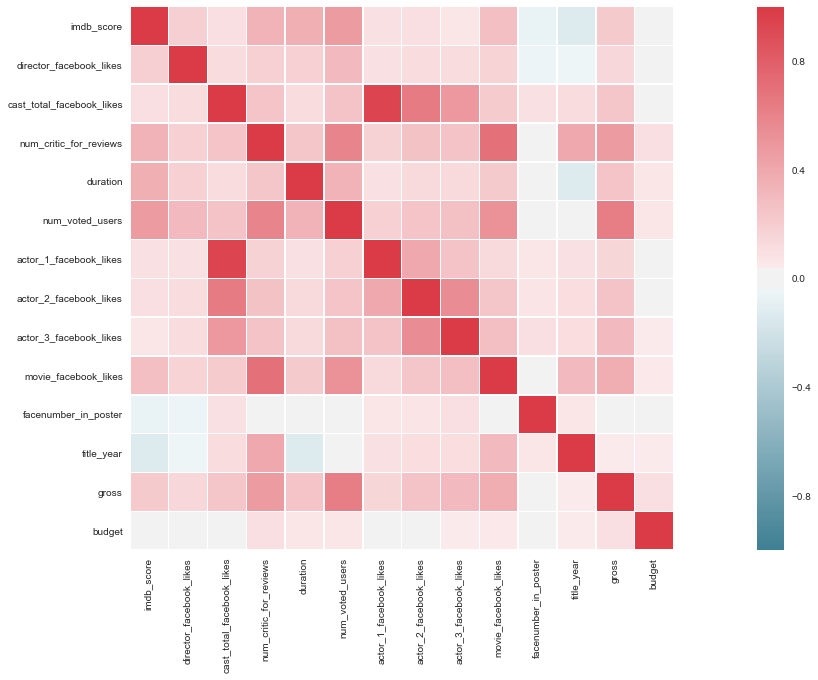

In [20]:
sns.set(style="white")

df_corr= df[['imdb_score','director_facebook_likes','cast_total_facebook_likes','num_critic_for_reviews','duration',
            'num_voted_users','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','movie_facebook_likes',
            'facenumber_in_poster','title_year','gross', 'budget']]

# Compute the correlation matrix
corr = df_corr.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax)

# Insights from Regression/Classification Models

Regression model can predict the actual imdb_score with less than 50% accuracy based on certain predictors say 'director_facebook_likes','duration', 'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes', 'facenumber_in_poster','title_year', 'budget'.

Since the fitted Random Forest/Bayesian model explains more variability than that of multiple linear regression, I will use the results from Random Forest/Bayesian to explain the insights found so far:

The most important factor that affects movie rating is the duration. The longer the movie is, the higher the rating will be.

Budget is important, although there is no strong correlation between budget and movie rating.

The facebook popularity of director is an important factor to affect a movie rating.

The facebook popularity of the top 3 actors/actresses is important.

The number of faces in movie poster has a non-neglectable effect to the movie rating.

After discretizing the imdb_score to two categories Bad (0 to 7.5) and good(7.6 to 10) and fit to different classification models say Decision Tree, RandomForest and Logistic Regression, i am getting 82% of average model prediction accuracy with 18% error prediction rate for the test. That's good actually.

Whereas with original IMDB_score, different regression models can predict only with 47% accuracy.
